In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from scipy.stats import levy
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler




In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
# Check for missing values
print(df.isnull().sum())
# Remove duplicates
df.drop_duplicates(inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.columns)
# If leading or trailing whitespaces are present, remove them
df.columns = df.columns.str.strip()


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
# Assuming df is your DataFrame and "TotalCharges" column contains float numbers

# Convert "TotalCharges" column to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with 0 (or any other suitable value)
df['TotalCharges'].fillna(0, inplace=True)

# Convert float numbers to integers
df['TotalCharges'] = df['TotalCharges'].astype(int)
# Assuming df is your DataFrame and "MonthlyCharges" column contains float numbers

# Convert "MonthlyCharges" column to numeric, coerce errors to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Fill NaN values with 0 (or any other suitable value)
df['MonthlyCharges'].fillna(0, inplace=True)

# Convert float numbers to integers
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)



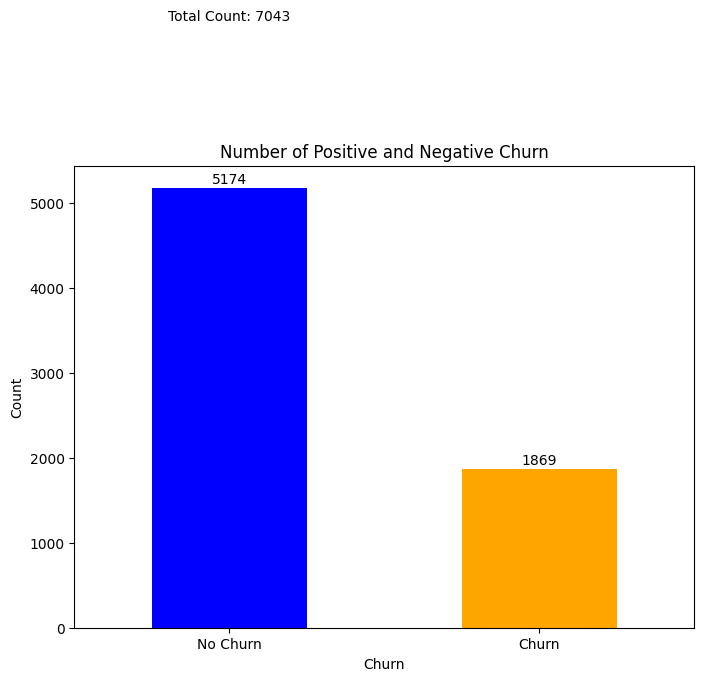

In [7]:
import matplotlib.pyplot as plt

# Count the number of positive and negative churn
churn_counts = df['Churn'].value_counts()

# Limit the total count to 7000
churn_counts = churn_counts[:7000]

# Plot the bar graph
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])

# Add total count at the top of the plot
total_count = churn_counts.sum()
plt.text(0, total_count + 100, f'Total Count: {total_count}', ha='center')

# Add counts on top of each bar
for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, str(count), ha='center')

plt.title('Number of Positive and Negative Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.show()


In [8]:
encoder = LabelEncoder()
# Encoding target variable 'Churn'
y = encoder.fit_transform(df["Churn"])
df.drop(['Churn'], axis=1, inplace=True)  
X = df.copy()
# Encoding categorical variables

X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])
# Print features (X)
print("Features (X):")
print(X.head())

# Print target variable (y)
print("\nTarget Variable (y):")
print(y)



Features (X):
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        7590       0              0        1           0       1   
1        5575       1              0        0           0      34   
2        3668       1              0        0           0       2   
3        7795       1              0        0           0      45   
4        9237       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             0              1                0               0             2   
1             1              0                0               2             0   
2             1              0                0               2             2   
3             0              1                0               2             0   
4             1              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0       

In [9]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Testing the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
#print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy * 100, "%")

Accuracy: 73.52732434350602 %


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Preprocessing: Encoding categorical variables
# (You may need to handle missing values and perform other preprocessing steps as necessary)
# Encoding categorical variables
# (Replace this with your actual preprocessing steps)



encoder = LabelEncoder()
# Encoding target variable 'Churn'
y = encoder.fit_transform(df["Churn"])
df.drop(['Churn'], axis=1, inplace=True)  
X = df.copy()
# Encoding categorical variables

X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])


# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cuckoo Search Algorithm
def initialize_nests(dim, n):
    return np.random.rand(n, dim)

def get_objective(solution):
    # Placeholder for your objective function
    # This function should return a scalar value indicating the fitness of the solution
    return np.sum(solution)

def get_best_nest(nests, obj_values):
    return nests[np.argmin(obj_values)]

def levy_flight(beta=1.5):
    sigma = (np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) / (np.math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v) ** (1 / beta)
    return step

def cuckoo_search(n, dim, max_iter):
    nests = initialize_nests(dim, n)
    obj_values = [get_objective(nest) for nest in nests]
    best_nest = get_best_nest(nests, obj_values)
    best_obj_value = get_objective(best_nest)

    for _ in range(max_iter):
        new_nests = nests.copy()
        for i, nest in enumerate(new_nests):
            step_size = levy_flight()
            random_nest_index = np.random.randint(n)
            random_nest = nests[random_nest_index]
            step = step_size * (nest - random_nest)
            new_nests[i] += step
            new_nests[i] = np.clip(new_nests[i], 0, 1)  # Ensure solutions are within bounds
        obj_values = [get_objective(new_nest) for new_nest in new_nests]
        new_best_nest = get_best_nest(new_nests, obj_values)
        new_best_obj_value = get_objective(new_best_nest)
        if new_best_obj_value < best_obj_value:
            best_nest = new_best_nest
            best_obj_value = new_best_obj_value
        nests = new_nests
    return best_nest

# Feature selection using Cuckoo Search
n_features = X_train.shape[1]
n_cuckoos = 20  # Number of cuckoos (population size)
max_iterations = 100  # Maximum number of iterations

# Selecting the best features using Cuckoo Search
best_feature_indices = cuckoo_search(n_cuckoos, n_features, max_iterations)

# Sort the indices based on their fitness values
sorted_indices = np.argsort(best_feature_indices)

# Ensure at least 2 best features are selected
num_selected_features = len(sorted_indices)
num_features_to_select = min(num_selected_features, 10)

# Print the indices of the best features selected
print("Indices of the best features selected:", sorted_indices[:num_features_to_select])
# Print the total number of best features selected
print("Total number of best features selected:", num_features_to_select)

# Selecting the best features
X_train_selected = X_train.iloc[:, sorted_indices[:num_features_to_select]]
X_test_selected = X_test.iloc[:, sorted_indices[:num_features_to_select]]

# Training SVM model with the selected features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)

# Testing SVM model
y_pred = svm_model.predict(X_test_selected)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")


Indices of the best features selected: [ 0 17 16 15 12 11 10 18  9  5]
Total number of best features selected: 10
Accuracy: 80.35967818267865 %


In [11]:
import numpy as np
from sklearn.svm import SVC

# Define the selected features
selected_features = ['monthly_usage', 'contract_type', 'customer_satisfaction']

# Define John's information for the selected features
customer_data = {'monthly_usage': 200, 'contract_type': 1, 'customer_satisfaction': 8}

# Create a training dataset with dummy data (replace with actual data)
X_train = np.array([[250, 2, 7],
                    [150, 1, 9],
                    [180, 1, 6]])

y_train = np.array([1, 0, 1])  # Example churn labels (1 for high churn, 0 for low churn)

# Train the SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Filter the customer features based on the selected features
filtered_customer_features = np.array([[customer_data[feature] for feature in selected_features]])

# Predict churn rate for John
churn_prediction = classifier.predict(filtered_customer_features)

if churn_prediction == 1:
    print("Churn rate for John is predicted to be high.")
else:
    print("Churn rate for John is predicted to be low.")


Churn rate for John is predicted to be high.


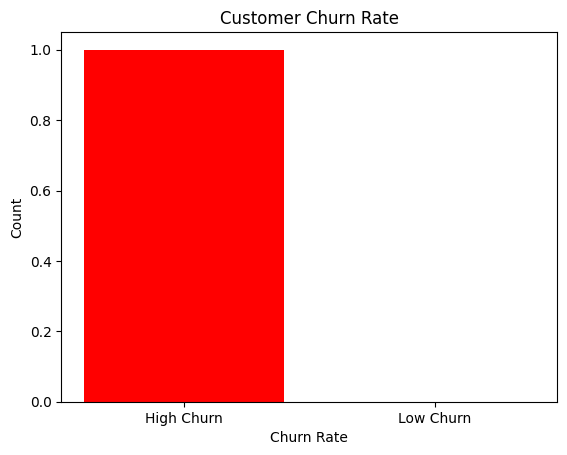

In [12]:
import matplotlib.pyplot as plt

# Define the churn label for the particular customer (replace 1 with actual churn label)
churn_label = 1  # 1 for high churn, 0 for low churn

# Define labels and heights for the bar graph
labels = ['High Churn', 'Low Churn']
heights = [1, 0] if churn_label == 1 else [0, 1]  # Adjust heights based on churn label

# Define colors for the bars
colors = ['red' if label == 'High Churn' else 'blue' for label in labels]

# Create bar graph
plt.bar(labels, heights, color=colors)

# Add labels and title
plt.xlabel('Churn Rate')
plt.ylabel('Count')
plt.title('Customer Churn Rate')

# Show the bar graph
plt.show()
